In [ ]:
# Installing the neccessary Liberaries
!pip install transformers
!pip install sentencepiece
!pip install transformers datasets flask torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# **Data Analysis and EDA**

In [ ]:
# importing necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [ ]:
# Load the SQuAD dataset
dataset = load_dataset("squad_v2")
train_data = dataset['train']
validation_data = dataset['validation']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

In [ ]:
# Convert to DataFrame for easier manipulation
train_df = pd.DataFrame(train_data)
validation_df = pd.DataFrame(validation_data)

In [ ]:
# Basic Structure and Size
print("Training Set Size:", len(train_df))
print("Validation Set Size:", len(validation_df))
print("\nColumns:", train_df.columns)


Training Set Size: 130319
Validation Set Size: 11873

Columns: Index(['id', 'title', 'context', 'question', 'answers'], dtype='object')


In [ ]:
# Analyze Context Length
train_df['context_length'] = train_df['context'].apply(len)
validation_df['context_length'] = validation_df['context'].apply(len)

print("\nContext Length (Train):")
print(train_df['context_length'].describe())



Context Length (Train):
count    130319.000000
mean        754.566287
std         307.619239
min         151.000000
25%         561.000000
50%         692.000000
75%         891.000000
max        3706.000000
Name: context_length, dtype: float64


In [ ]:
# Analyze Question Length
train_df['question_length'] = train_df['question'].apply(len)
validation_df['question_length'] = validation_df['question'].apply(len)

print("\nQuestion Length (Train):")
print(train_df['question_length'].describe())



Question Length (Train):
count    130319.000000
mean         58.507739
std          73.757111
min           1.000000
25%          44.000000
50%          55.000000
75%          69.000000
max       25651.000000
Name: question_length, dtype: float64


In [ ]:
train_df.head()

,id,title,context,question,answers,context_length,question_length
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'...",694,40
1,56be85543aeaaa14008c9065,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,"{'text': ['singing and dancing'], 'answer_star...",694,58
2,56be85543aeaaa14008c9066,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,"{'text': ['2003'], 'answer_start': [526]}",694,64
3,56bf6b0f3aeaaa14008c9601,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"{'text': ['Houston, Texas'], 'answer_start': [...",694,45
4,56bf6b0f3aeaaa14008c9602,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,"{'text': ['late 1990s'], 'answer_start': [276]}",694,42


In [ ]:
# Unanswerable Questions
train_df['is_impossible'] = train_df['answers'].apply(lambda x: len(x['text']) == 0)
validation_df['is_impossible'] = validation_df['answers'].apply(lambda x: len(x['text']) == 0)

unanswerable_percentage = train_df['is_impossible'].mean() * 100
print(f"\nPercentage of Unanswerable Questions (Train): {unanswerable_percentage:.2f}%")



Percentage of Unanswerable Questions (Train): 33.38%


In [ ]:
train_df.head()

,id,title,context,question,answers,context_length,question_length,is_impossible
0,56be85543aeaaa14008c9063,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,"{'text': ['in the late 1990s'], 'answer_start'...",694,40,False
1,56be85543aeaaa14008c9065,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,"{'text': ['singing and dancing'], 'answer_star...",694,58,False
2,56be85543aeaaa14008c9066,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,"{'text': ['2003'], 'answer_start': [526]}",694,64,False
3,56bf6b0f3aeaaa14008c9601,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"{'text': ['Houston, Texas'], 'answer_start': [...",694,45,False
4,56bf6b0f3aeaaa14008c9602,Beyoncé,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,"{'text': ['late 1990s'], 'answer_start': [276]}",694,42,False


In [ ]:
# Analyze Answer Lengths
train_df['answer_length'] = train_df['answers'].apply(lambda x: len(x['text'][0]) if len(x['text']) > 0 else 0)
validation_df['answer_length'] = validation_df['answers'].apply(lambda x: len(x['text'][0]) if len(x['text']) > 0 else 0)

print("\nAnswer Length (Train):")
print(train_df['answer_length'].describe())



Answer Length (Train):
count    130319.00000
mean         13.42376
std          20.01709
min           0.00000
25%           0.00000
50%           7.00000
75%          17.00000
max         239.00000
Name: answer_length, dtype: float64


## **Visualizations**

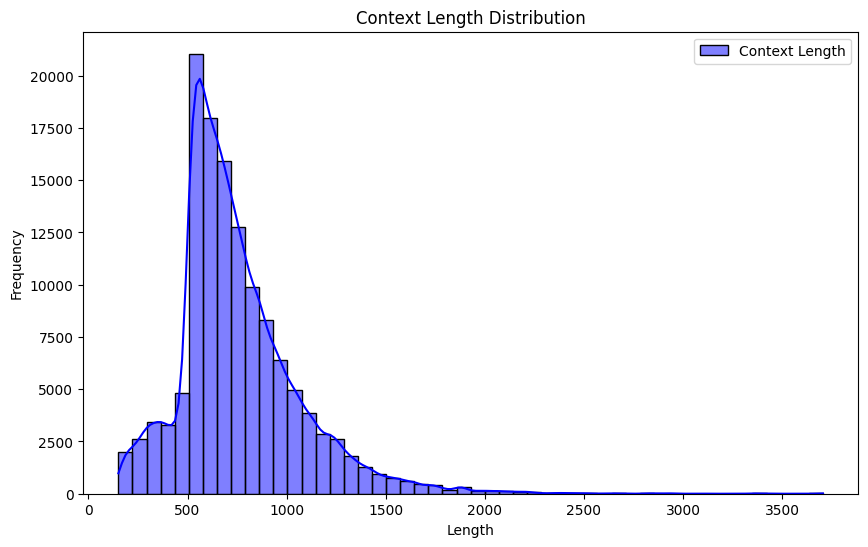

In [ ]:
# Context Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['context_length'], bins=50, kde=True, color='blue', label='Context Length')
plt.title("Context Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


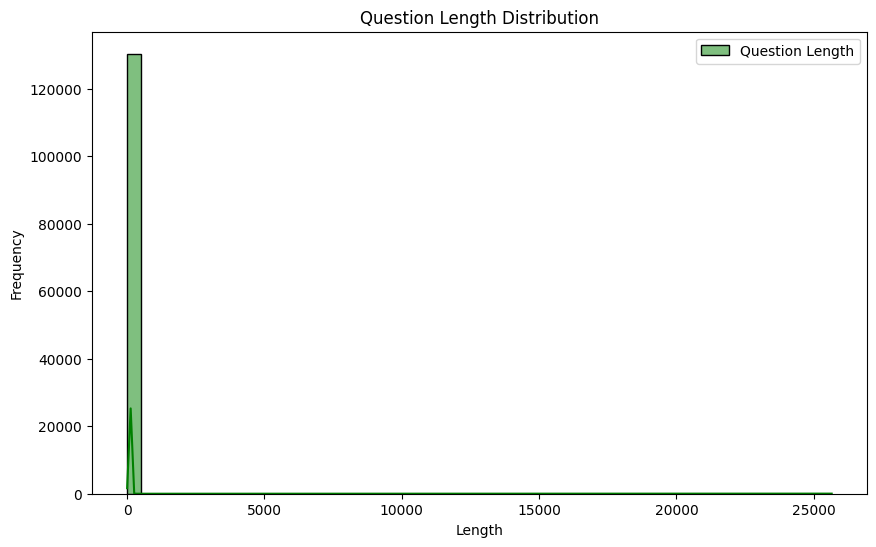

In [ ]:
# Question Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['question_length'], bins=50, kde=True, color='green', label='Question Length')
plt.title("Question Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


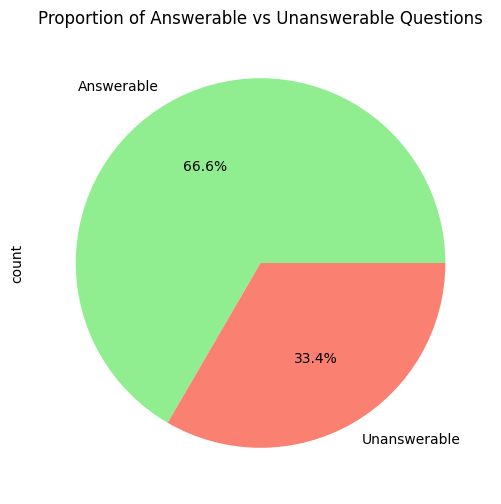

In [ ]:
# Unanswerable Questions Proportion
plt.figure(figsize=(6, 6))
train_df['is_impossible'].value_counts().plot.pie(
    autopct='%1.1f%%', labels=['Answerable', 'Unanswerable'], colors=['lightgreen', 'salmon']
)
plt.title("Proportion of Answerable vs Unanswerable Questions")
plt.show()

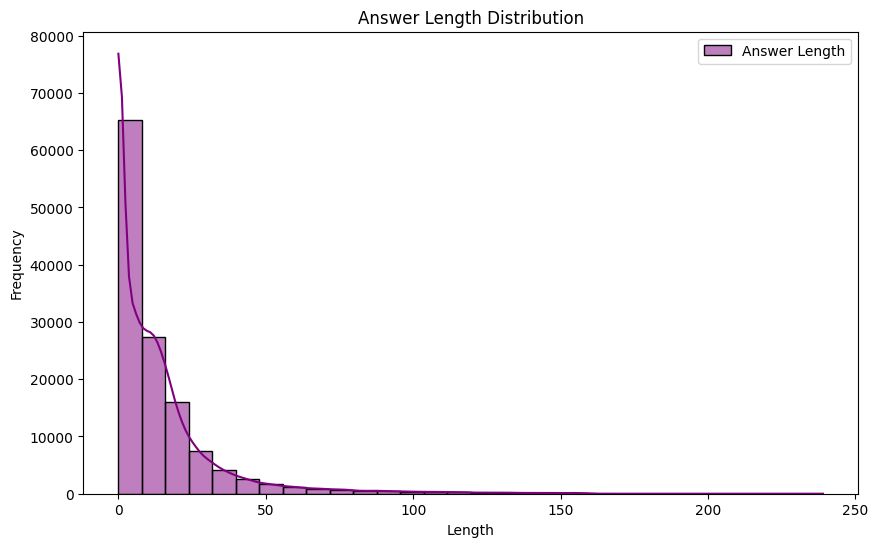

In [ ]:
# Answer Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['answer_length'], bins=30, kde=True, color='purple', label='Answer Length')
plt.title("Answer Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# Exploratory Data Analysis (EDA) Insights

## Context Length Distribution
- **Observation:** The distribution of context lengths is right-skewed, indicating that most context lengths are relatively short, with a steep drop-off as the length increases.
- **Key Statistics:** The peak frequency occurs at approximately 500, with some instances reaching lengths over 3000, but these are relatively rare.
- **Potential Insights:** Shorter context lengths dominate the dataset, which could imply concise and focused contexts in the majority of cases.

## Answer Length Distribution
- **Observation:** The distribution of answer lengths is highly right-skewed, with most answers being very short.
- **Key Statistics:** The peak occurs below 50 characters, and the frequency diminishes rapidly for longer answers, with very few exceeding 200 characters.
- **Potential Insights:** The predominance of shorter answers suggests the dataset favors brief responses, which might align with specific question-answering tasks requiring concise outputs.

## General Insights
- **Skewness:** Both context and answer lengths exhibit a right-skewed distribution, reflecting the presence of a small number of significantly longer samples.
- **Implications for Modeling:** Models should be optimized to handle the abundance of shorter contexts and answers effectively, while accounting for the less frequent longer samples.
- **Suggestions for Preprocessing:** Consider truncating or padding sequences to a manageable length for downstream tasks, ensuring the majority of data is represented without significant loss of information.



# **Fine-Tune BERT in Colab**


In [ ]:
# Install necessary Liberary
from transformers import BertTokenizer, BertForQuestionAnswering, TrainingArguments, Trainer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
# tokenizing the data
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def preprocess_with_chunking(batch):
    # Tokenize with truncation and stride
    tokenized_examples = tokenizer(
        batch["question"],
        batch["context"],
        max_length=256,
        truncation="only_second",  # Truncate the context, not the question
        stride=128,               # Overlap tokens to avoid missing answers
        return_overflowing_tokens=True,  # Include overflow chunks
        return_offsets_mapping=True,     # Keep track of offsets
        padding="max_length"
    )

    # Map start and end positions for each chunk
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")
    offset_mapping = tokenized_examples.pop("offset_mapping")

    start_positions = []
    end_positions = []

    for i, offsets in enumerate(offset_mapping):
        input_ids = tokenized_examples["input_ids"][i]
        sample_index = sample_mapping[i]
        answers = batch["answers"][sample_index]
        answer_starts = answers["answer_start"]
        answer_texts = answers["text"]

        if len(answer_starts) == 0:
            # No answer case
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Find start and end character positions of the answer in the chunk
            start_char = answer_starts[0]
            end_char = start_char + len(answer_texts[0])

            # Find the token start and end
            token_start = 0
            token_end = len(input_ids) - 1

            while token_start < len(offsets) and offsets[token_start][0] <= start_char:
                token_start += 1
            while token_end > 0 and offsets[token_end][1] >= end_char:
                token_end -= 1

            # Adjust for padding
            start_positions.append(token_start - 1)
            end_positions.append(token_end + 1)

    tokenized_examples["start_positions"] = start_positions
    tokenized_examples["end_positions"] = end_positions
    return tokenized_examples


In [ ]:
from transformers import AutoTokenizer

# Use a tokenizer derived from PreTrainedTokenizerFast
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)


In [ ]:
print(type(tokenizer))

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [ ]:
tokenized_datasets = dataset.map(preprocess_with_chunking, batched=True, remove_columns=dataset["train"].column_names)


Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Map:   0%|          | 0/11873 [00:00<?, ? examples/s]

Great! The tokenization and preprocessing with chunking are successfully completed. Now, proceeding to the fine-tuning phase using the tokenized dataset.



## **Steps for Fine-Tuning BERT for Question Answering**
1. Load the Pretrained BERT Model for QA: Use the BertForQuestionAnswering model from Hugging Face.

2. Prepare the DataLoader: Convert the tokenized dataset into PyTorch DataLoader for training.

3. Define Training Parameters: Set up an optimizer, learning rate scheduler, and loss function.

4. Train the Model: Use a training loop to fine-tune the BERT model.



In [ ]:
# Load the model
from transformers import BertForQuestionAnswering

# Load pretrained BERT model for QA
model = BertForQuestionAnswering.from_pretrained("bert-base-uncased")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The warning indicates that the model ***BertForQuestionAnswering*** has initialized certain weights ***(qa_outputs.bias and qa_outputs.weight)*** specifically for the question-answering task. This is expected when using a general-purpose pre-trained BERT model like bert-base-uncased and adapting it for a downstream task like Question Answering.



### **Prepare DataLoader**

Convert the tokenized dataset to a PyTorch DataLoader:


In [ ]:
from torch.utils.data import DataLoader

# Convert tokenized dataset to PyTorch DataLoader
#train_dataloader = DataLoader(
    #tokenized_datasets["train"],
    #batch_size=16,  # Adjust batch size based on the GPU memory
    #shuffle=True
#)

#val_dataloader = DataLoader(
    #tokenized_datasets["validation"],
    #batch_size=16
#)


In [ ]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")
train_dataloader = DataLoader(
    tokenized_datasets["train"], batch_size=4, shuffle=True, collate_fn=data_collator
)


In [ ]:
train_dataloader = DataLoader(
    tokenized_datasets["train"], batch_size=4, shuffle=True,
    collate_fn=data_collator, num_workers=4
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:

train_dataloader = DataLoader(
    tokenized_datasets["train"],
    batch_size=4,  # Reduce batch size to 4
    shuffle=True,
    collate_fn=data_collator,  # Ensure correct batching
    num_workers=4  # Utilize multiple CPU cores for loading
)

eval_dataloader = DataLoader(
    tokenized_datasets["validation"],
    batch_size=4,  # Match the batch size for evaluation
    collate_fn=data_collator
)


### **Define Optimizer and Scheduler**

In [ ]:
from transformers import AdamW
from transformers import get_scheduler

In [ ]:
# Define optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Define learning rate scheduler
num_training_steps = len(train_dataloader) * 3  # Assuming 3 epochs
lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### **Set Up Training Loop**

In [ ]:
import torch
from tqdm import tqdm

In [ ]:
from datasets import DatasetDict
from transformers import AutoTokenizer, DataCollatorWithPadding

Inspect the Batch Structure: Add a debugging print to the loop:

In [ ]:
# Preprocessing with PyTorch-compatible tensors
tokenized_datasets = dataset.map(
    preprocess_with_chunking,
    batched=True,
    remove_columns=dataset["train"].column_names
)
tokenized_datasets.set_format(type="torch")

# Data collator for proper batching
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# Create DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(
    tokenized_datasets["train"], batch_size=16, shuffle=True, collate_fn=data_collator
)


Map:   0%|          | 0/130319 [00:00<?, ? examples/s]

Verify Tokenization and Dataset Format: Ensure the dataset is in PyTorch format. Use the set_format() method:

In [ ]:
for batch in train_dataloader:
    print(batch)
    break


{'input_ids': tensor([[  101,  2054,  2018,  ...,     0,     0,     0],
        [  101,  2040,  2165,  ...,     0,     0,     0],
        [  101,  2054,  2597,  ...,     0,     0,     0],
        ...,
        [  101,  2029,  4145,  ..., 16083,  1996,   102],
        [  101,  2129,  2106,  ...,     0,     0,     0],
        [  101,  1999,  2054,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'start_positions': tensor([  0,  51,   0,   0,  13,  68, 210,   0,  56, 131,  23,   0,  74,   0,
         72,   0]), 'end_positions': tensor([  0, 25

In [ ]:

#model.train()
#optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#model.to(device)

#epochs = 3
#for epoch in range(epochs):
    #progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")
    #for batch in progress_bar:
        # Move tensors to device
       # batch = {key: val.to(device) for key, val in batch.items()}

        # Forward pass
        #outputs = model(**batch)
        #loss = outputs.loss

        # Backward pass and optimization
        #optimizer.zero_grad()
        #loss.backward()
        #optimizer.step()

        #progress_bar.set_postfix({"loss": loss.item()})
